One common plotting technique has not been discussed thus far in the course, and that’s stacking. Stacked bar charts and histograms are not uncommon, but there are often better plot choices available.

The most basic stacked chart takes a single bar representing the full count, and divides it into colored segments based on frequencies on a categorical variable. If this sounds familiar, that's because it almost perfectly coincides with the description of a pie chart, except that the shape being divided is different.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(20)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,Cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


(0, 2)

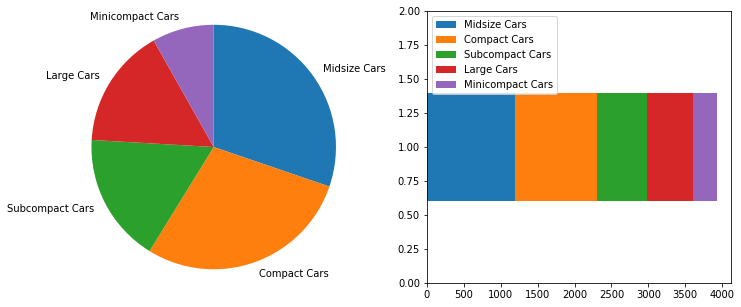

In [24]:
# pre-processing: count and sort by the number of instances of each category
sorted_counts = fuel_econ['VClass'].value_counts()

# establish the Figure
plt.figure(figsize = [12, 5])

# left plot: pie chart
plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');


# right plot: horizontally stacked bar
plt.subplot(1, 2, 2)
baseline = 0
for i in range(sorted_counts.shape[0]):
    plt.barh(y = 1, width = sorted_counts[i], left = baseline)
    baseline += sorted_counts[i]

plt.legend(sorted_counts.index)  # add a legend for labeling
plt.ylim([0,2]) # give some vertical spacing around the bar

The stacked bar is built through successive calls of the matplotlib barh function; each time the function is called, the bar that is plotted is assigned a new color. The choice of "y" is arbitrary: it'll just center the bar around y = 1, but it doesn't have any inherent meaning. The "left" parameter specifies the left edge of each bar added to the stack, which starts at the baseline of 0 and is built up with each stacked bar. Note in this case that the bar is being plotted with absolute counts, rather than proportions. A discussion of absolute vs. relative frequencies will come later down the page!

Given this similarity, cautions regarding use of the stacked bar are fairly similar to that of the pie chart:

Make sure that relative frequencies are a meaningful comparison.
Try to limit yourself to a small number of categories, up to about five.
Make sure that categories are arranged in a sensible order, e.g. by frequency for nominal data or by levels for ordinal data.
Otherwise, the standard bar chart is a reliable option that should be used in most cases. Only use the pie chart or singly divided bar if there's a compelling reason to do so.

The debate becomes more interesting when multiple features get involved. When should we feel free to create a stacked bar chart versus using a clustered bar chart? There are two major categories of stacked bar chart that I want to focus on here: plotting by absolute frequency and plotting by relative frequency. We'll start with code for an absolute frequency stacked chart below.

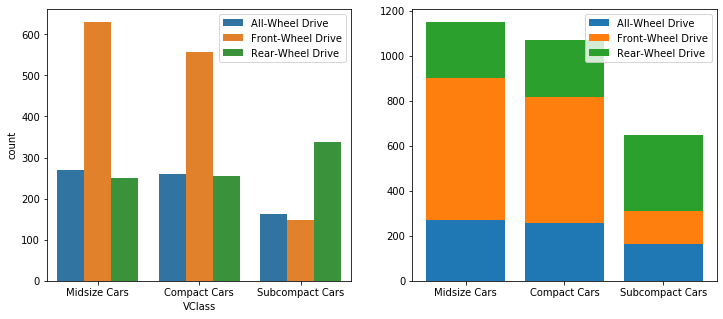

In [29]:
vclass_order = ['Midsize Cars', 'Compact Cars', 'Subcompact Cars']
drive_order = ['All-Wheel Drive', 'Front-Wheel Drive', 'Rear-Wheel Drive']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'drive',
             order = vclass_order, hue_order = drive_order)
plt.legend()

# right plot: stacked bar chart, absolute counts
plt.subplot(1, 2, 2)

baselines = np.zeros(len(vclass_order))
# for each second-variable category:
for i in range(len(drive_order)):
    # isolate the counts of the first category,
    drive = drive_order[i]
    inner_counts = fuel_econ[fuel_econ['drive'] == drive]['VClass'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(vclass_order)), height = inner_counts[vclass_order],
            bottom = baselines)
    baselines += inner_counts[vclass_order]

plt.xticks(np.arange(len(vclass_order)), vclass_order)
plt.legend(drive_order)

The stacked bar chart plotted by absolute frequency carries one big advantage over the clustered bar chart: for the variable plotted on the x-axis, it's clear which category level has the highest frequency, in this case "East". The values of this variable can be interpreted just like the univariate bar chart. The disadvantage of the stacked bar chart comes with interpretation of the second, stacked variable. If you want to compare the relative counts of this second variable across levels of the first, you can really only do that for the category plotted on the baseline, which in this case is the blue one, "Type X". For the remaining categories, it's much harder to make the comparison of values – you can't really tell that the counts of "Type O" are larger in the "South" than the "North" from the stacked chart, where it's directly comparable in the clustered bar chart.

Now, let's take a look at what happens when we create the stacked bar chart with relative frequencies instead, where each bar is scaled to a total height of 1.

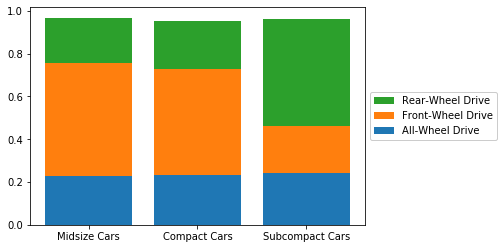

In [30]:
vclass_order = ['Midsize Cars', 'Compact Cars', 'Subcompact Cars']
drive_order = ['All-Wheel Drive', 'Front-Wheel Drive', 'Rear-Wheel Drive']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(vclass_order))
vclass_counts = fuel_econ['VClass'].value_counts()

# for each second-variable category:
for i in range(len(drive_order)):
    # isolate the counts of the first category,
    drive = drive_order[i]
    inner_counts = fuel_econ[fuel_econ['drive'] == drive]['VClass'].value_counts()
    inner_props = inner_counts / vclass_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(vclass_order)),
                   height = inner_props[vclass_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[vclass_order]

plt.xticks(np.arange(len(vclass_order)), vclass_order)
plt.legend(reversed(artists), reversed(drive_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

There are two main changes to this code compared to the previous plot. First of all, the cat1_counts variable has been computed to change the absolute frequencies into relative frequencies within each x-axis category. Secondly, some code has been added to reverse the order of bars in the legend. The artists variable has been added to store references to each of the bar groups added from each bar call. Then in the legend function call, we make use of the built-in Python function reversed to reverse the order in which the artists and labels are included in the legend. The additional parameters affect the positioning of the legend: setting an anchor for the legend box on the right side of the plot via "bbox_to_anchor", and positioning the anchor to the legend's left with "loc = 6".

Since the bars are all the same height of 1 with a relative frequency stacked bar chart, we lose the ability to compare the absolute counts on the categorical variable plotted on the x-axis (i.e. we can't tell that "East" has the most counts and "North" the least amount). In exchange, we can now compare the relative prevalence of the stacked variable on both the first category on the bottom ("Type X") as well as the category on the top ("Type O"). We can now see that, in terms of relative frequency, "Type X" has a fairly consistent presence in "South", "West", and "North", and that "Type O" has its highest relative frequency in "North". Unfortunately, this still doesn't help us make easy comparisons about the "Type Y" and "Type Z" categories that are sandwiched in between. This major limitation is a big reason why other plot types like clustered bar or line charts are often preferable to stacking.